In [1]:
import os 
import pandas as pd
import numpy as np
from scipy import ndimage
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data=pd.read_table('TV2_002.tsv', on_bad_lines='skip')
data
print(len(data))

207


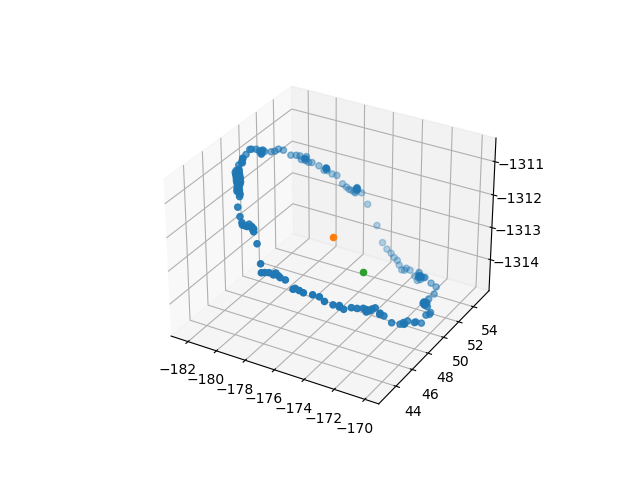

In [3]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(data.loc[:,['Tx.1']], data.loc[:,['Ty.1']], data.loc[:,['Tz.1']]);
ax.scatter3D((data['Tx.1'].max()+data['Tx.1'].min())/2,
              (data['Ty.1'].max()+data['Ty.1'].min())/2,
              (data['Tz.1'].max()+data['Tz.1'].min())/2);
ax.scatter3D(data['Tx.4'].mean(),data['Ty.4'].mean(),data['Tz.4'].mean())

In [4]:
print('calculated center (x,y,z) : ({}, {}, {})'.format((data['Tx.1'].max()+data['Tx.1'].min())/2,
              (data['Ty.1'].max()+data['Ty.1'].min())/2,
              (data['Tz.1'].max()+data['Tz.1'].min())/2))
print('marker position (x,y,z) : ({}, {}, {})'.format(data['Tx.4'].mean(),data['Ty.4'].mean(),data['Tz.4'].mean()))

calculated center (x,y,z) : (-176.15449999999998, 49.061, -1312.643)
marker position (x,y,z) : (-174.95112077294692, 50.56485990338164, -1313.9009516908213)


In [5]:
print('distance between the calculated center and the marker position in = {} mm'.format(np.sqrt((data['Tx.4'].mean()-(data['Tx.1'].max()+data['Tx.1'].min())/2)**2+(data['Ty.4'].mean()-(data['Ty.1'].max()+data['Ty.1'].min())/2)**2+(data['Tz.4'].mean()-(data['Tz.1'].max()+data['Tz.1'].min())/2)**2)))
d_cal_pos=np.sqrt((data['Tx.4'].mean()-(data['Tx.1'].max()+data['Tx.1'].min())/2)**2+(data['Ty.4'].mean()-(data['Ty.1'].max()+data['Ty.1'].min())/2)**2+(data['Tz.4'].mean()-(data['Tz.1'].max()+data['Tz.1'].min())/2)**2)

distance between the calculated center and the marker position in = 2.300469219429381 mm


In [6]:
data_after=pd.read_csv('TV2_after_001.csv', on_bad_lines='skip')
#data_after

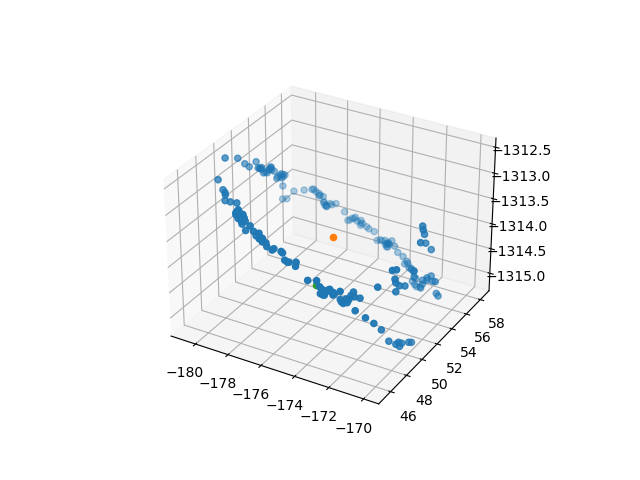

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data_after.loc[:,['Tx']], data_after.loc[:,['Ty']], data_after.loc[:,['Tz']]);
ax.scatter3D((data_after['Tx'].max()+data_after['Tx'].min())/2,
              (data_after['Ty'].max()+data_after['Ty'].min())/2,
              (data_after['Tz'].max()+data_after['Tz'].min())/2);
ax.scatter3D(pd.read_table('TV2_after_002.tsv', on_bad_lines='skip')['Tx.3'].mean(),
     pd.read_table('TV2_after_002.tsv', on_bad_lines='skip')['Ty.3'].mean(),
     pd.read_table('TV2_after_002.tsv', on_bad_lines='skip')['Tz.3'].mean())


In [8]:
print('calculated center after manual repositioning (x,y,z) : ({}, {}, {})'.format((data_after['Tx'].max()+data_after['Tx'].min())/2, (data_after['Ty'].max()+data_after['Ty'].min())/2,(data_after['Tz'].max()+data_after['Tz'].min())/2))
print('marker position after manual repositioning (x,y,z) : ({}, {}, {})'.format(pd.read_table('TV2_after_002.tsv', on_bad_lines='skip')['Tx.3'].mean(),
                                                                               pd.read_table('TV2_after_002.tsv', on_bad_lines='skip')['Ty.3'].mean(),
                                                                               pd.read_table('TV2_after_002.tsv', on_bad_lines='skip')['Tz.3'].mean()))

calculated center after manual repositioning (x,y,z) : (-175.332, 51.8965, -1313.8429999999998)
marker position after manual repositioning (x,y,z) : (-175.00795169082127, 49.18668599033818, -1314.3569082125607)


In [9]:
print('distance between the calculated center after manual repositioning and the marker position after manual repositioning in = {} mm'.format(np.sqrt((pd.read_table('TV2_after_002.tsv', on_bad_lines='skip')['Tx.3'].mean()-(data_after['Tx'].max()+data_after['Tx'].min())/2)**2+(pd.read_table('TV2_after_002.tsv', on_bad_lines='skip')['Ty.3'].mean()-(data_after['Ty'].max()+data_after['Ty'].min())/2)**2+(pd.read_table('TV2_after_002.tsv', on_bad_lines='skip')['Tz.3'].mean()-(data_after['Tz'].max()+data_after['Tz'].min())/2)**2)))
d_cal_af_pos_af=np.sqrt((pd.read_table('TV2_after_002.tsv', on_bad_lines='skip')['Tx.3'].mean()-(data_after['Tx'].max()+data_after['Tx'].min())/2)**2+(pd.read_table('TV2_after_002.tsv', on_bad_lines='skip')['Ty.3'].mean()-(data_after['Ty'].max()+data_after['Ty'].min())/2)**2+(pd.read_table('TV2_after_002.tsv', on_bad_lines='skip')['Tz.3'].mean()-(data_after['Tz'].max()+data_after['Tz'].min())/2)**2)

distance between the calculated center after manual repositioning and the marker position after manual repositioning in = 2.777084968915895 mm


In [10]:
print('distance between the calculated center and the calculated center after manual repositioning in = {} mm'.format(np.sqrt(((data_after['Tx'].max()+data_after['Tx'].min())/2-(data['Tx.1'].max()+data['Tx.1'].min())/2)**2+((data_after['Ty'].max()+data_after['Ty'].min())/2-(data['Ty.1'].max()+data['Ty.1'].min())/2)**2+((data_after['Tz'].max()+data_after['Tz'].min())/2-(data['Tz.1'].max()+data['Tz.1'].min())/2)**2)))
d_cal_cal_af=np.sqrt(((data_after['Tx'].max()+data_after['Tx'].min())/2-(data['Tx.1'].max()+data['Tx.1'].min())/2)**2+((data_after['Ty'].max()+data_after['Ty'].min())/2-(data['Ty.1'].max()+data['Ty.1'].min())/2)**2+((data_after['Tz'].max()+data_after['Tz'].min())/2-(data['Tz.1'].max()+data['Tz.1'].min())/2)**2)

distance between the calculated center and the calculated center after manual repositioning in = 3.1869368522139823 mm


In [11]:
d_pos_pos_after=np.sqrt((pd.read_table('TV2_after_002.tsv', on_bad_lines='skip')['Tx.3'].mean()-data['Tx.4'].mean())**2+
                        (pd.read_table('TV2_after_002.tsv', on_bad_lines='skip')['Ty.3'].mean()-data['Ty.4'].mean())**2+
                        (pd.read_table('TV2_after_002.tsv', on_bad_lines='skip')['Tz.3'].mean()-data['Tz.4'].mean())**2)
print('distance between the marker position and the marker position after manual repositioning in = {} mm'.format(d_pos_pos_after))
f = open("TV2_2.txt", "w")
f.write("{}\n{}\n{}\n{}\n".format(d_cal_pos,d_cal_af_pos_af,d_cal_cal_af,d_pos_pos_after))
f.close()

distance between the marker position and the marker position after manual repositioning in = 1.452752366212715 mm


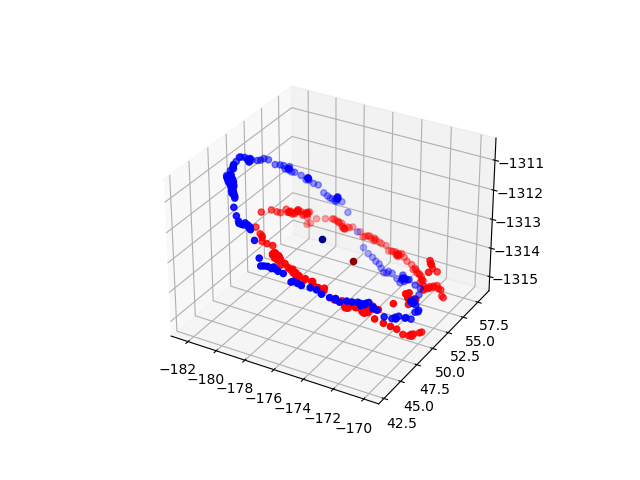

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(data_after.loc[:,['Tx']], data_after.loc[:,['Ty']], data_after.loc[:,['Tz']],c='red');
ax.scatter3D((data_after['Tx'].max()+data_after['Tx'].min())/2,
              (data_after['Ty'].max()+data_after['Ty'].min())/2,
              (data_after['Tz'].max()+data_after['Tz'].min())/2,c='darkred');

ax.scatter3D(data.loc[:,['Tx.1']], data.loc[:,['Ty.1']], data.loc[:,['Tz.1']],c='blue');
ax.scatter3D((data['Tx.1'].max()+data['Tx.1'].min())/2,
              (data['Ty.1'].max()+data['Ty.1'].min())/2,
              (data['Tz.1'].max()+data['Tz.1'].min())/2,c='darkblue');